# Company_Stock_and_Investment_Project-analysis-using-Time-series

### First we import some library

In [1]:
import keras 
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


In [2]:
import pandas as pd 
import numpy as np
import glob
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.tools as tls
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Company_Stock_and_Investment.csv")#,index_col=[0],parse_dates=True)
df

Date  Oil Investments  Gold Investments  Comp Stock  \
0     31-12-2009         0.025417          0.000150    0.017354   
1     04-01-2010         0.026830          0.001097    0.015565   
2     05-01-2010         0.002699          0.001560    0.001729   
3     06-01-2010         0.021688          0.006009   -0.015906   
4     07-01-2010        -0.006256          0.000221   -0.001849   
...          ...              ...               ...         ...   
1979  09-11-2017         0.005984          0.000623   -0.002043   
1980  10-11-2017        -0.007173         -0.000389   -0.006880   
1981  13-11-2017         0.000352         -0.004944   -0.004008   
1982  14-11-2017        -0.019376         -0.002621   -0.015118   
1983  15-11-2017        -0.007006          0.005963   -0.013190   

      Other sharesInvestments  
0                    0.006848  
1                   -0.004609  
2                    0.005900  
3                   -0.018116  
4                   -0.017013  
...                       ...  
1979                -0.003310  
1980                -0.003348  
1981                 0.003395  
1982                 0.006793  
1983                -0.008928  

[1984 rows x 5 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1984 non-null   object 
 1   Oil Investments          1984 non-null   float64
 2   Gold Investments         1984 non-null   float64
 3   Comp Stock               1984 non-null   float64
 4   Other sharesInvestments  1984 non-null   float64
dtypes: float64(4), object(1)
memory usage: 77.6+ KB


In [5]:
df.describe()

Oil Investments  Gold Investments   Comp Stock  Other sharesInvestments
count      1984.000000       1984.000000  1984.000000              1984.000000
mean         -0.000435         -0.020152     0.001007                 0.001269
std           0.030869          0.140965     0.016017                 0.019733
min          -1.000000         -1.000000    -0.123558                -0.126568
25%          -0.011021         -0.005881    -0.006926                -0.008492
50%           0.000277          0.000000     0.000876                 0.000840
75%           0.010734          0.005454     0.009708                 0.011632
max           0.119511          0.049577     0.088741                 0.157457

In [6]:
df.columns

Index(['Date', 'Oil Investments', 'Gold Investments', 'Comp Stock',
       'Other sharesInvestments'],
      dtype='object')

In [7]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

In [8]:
df.dtypes

Date                        object
Oil Investments            float64
Gold Investments           float64
Comp Stock                 float64
Other sharesInvestments    float64
dtype: object

In [9]:
df["Date"] = pd.to_datetime(df["Date"])
df.index

RangeIndex(start=0, stop=1984, step=1)

In [10]:
df["Date"].min()

Timestamp('2009-12-31 00:00:00')

In [11]:
df["Date"].max()

Timestamp('2017-12-10 00:00:00')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C420532790>,
      dtype=object)

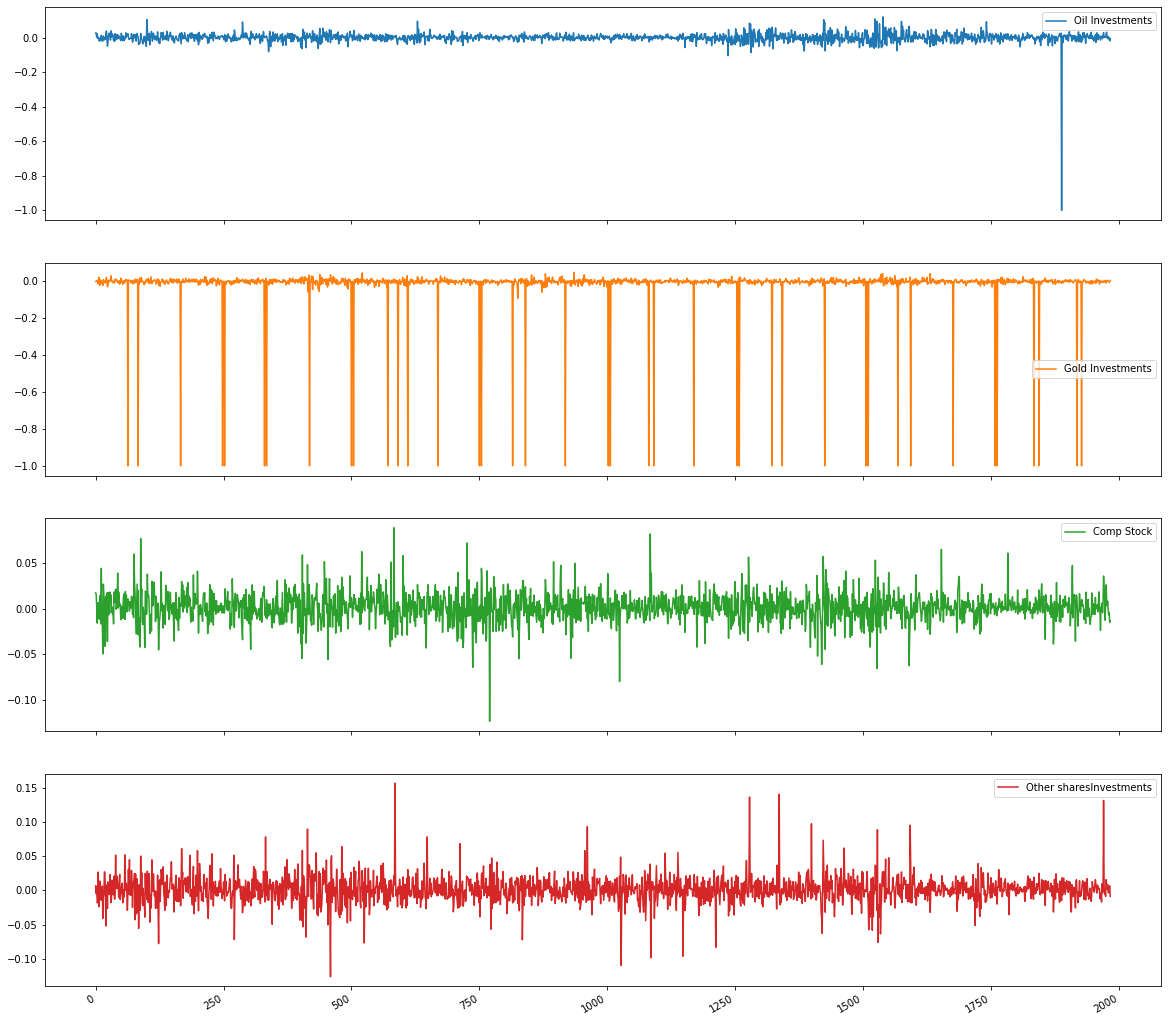

In [12]:
a = df[["Oil Investments", "Gold Investments","Comp Stock","Other sharesInvestments"]]
a.plot(subplots=True,figsize=(20,20))

## Cleaning the Data

In [13]:
# Removing weekends
df = df[(df["Date"].dt.dayofweek != 5) & (df["Date"].dt.dayofweek !=6) ]

In [14]:
df.isnull().sum()

Date                       0
Oil Investments            0
Gold Investments           0
Comp Stock                 0
Other sharesInvestments    0
dtype: int64

# Model 1 Oil Investments

In [15]:
df_oil = df.groupby("Date")["Oil Investments"].sum().reset_index()
df_oil.head()

Date  Oil Investments
0 2009-12-31         0.025417
1 2010-01-04         0.012942
2 2010-01-06        -0.017568
3 2010-01-07        -0.034925
4 2010-01-11         0.018293

In [16]:
df_oil.shape

(1766, 2)

In [17]:
#df = df.set_index(pd.DatetimeIndex(df["Date"].values))

In [18]:
df_oil.index

RangeIndex(start=0, stop=1766, step=1)

In [19]:
import plotly.express as px
fig = px.line(df_oil, x='Date', y='Oil Investments', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Checking data is Stationary

In [20]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12

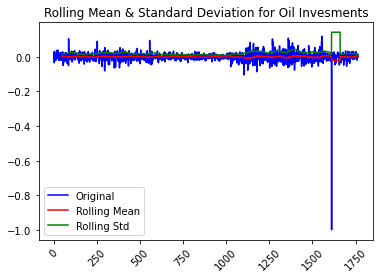

Results of Dickey-Fuller Test:
Test Statistics                -42.279673
p-value                          0.000000
# Lags Used                      0.000000
Number of Observation Used    1765.000000
Critical Value (1%)             -3.434060
Critical Value (5%)             -2.863179
Critical Value (10%)            -2.567643
dtype: float64


In [21]:
def test_stationarity(df_oil, ts):
    
    # Determin Rolling Statistics
    rolmean = df_oil["Oil Investments"].rolling(window = 50, center = False).mean()
    rolstd = df_oil["Oil Investments"].rolling(window = 50,center = False).std()
    
    # Plot rolling statistics
    orig = plt.plot(df_oil["Oil Investments"], color="blue",label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="green", label="Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation for %s" %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    
    # Perform Dickey-Fuller test:
    # Null Hpyothesis (H_0): Time series is not Stationary
    #Alternate Hypothesis (H_1): Time series is Stationary
    
    print("Results of Dickey-Fuller Test:")
    df_oil_test = statsmodels.tsa.stattools.adfuller(df_oil["Oil Investments"], autolag="AIC")
    
    df_oil_output = pd.Series(df_oil_test[0:4], index = ["Test Statistics","p-value","# Lags Used", "Number of Observation Used"])
    
    for key, value in df_oil_test[4].items():
        df_oil_output["Critical Value (%s)"%key] = value
    print(df_oil_output)

# Appplying th function to out Y variable: Oil Investments
test_stationarity(df_oil,"Oil Invesments")

### Our data is Stationary due to p-value

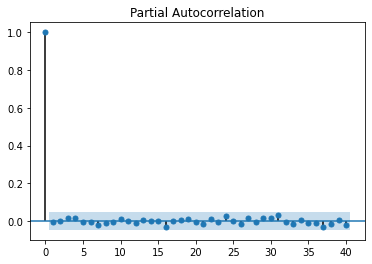

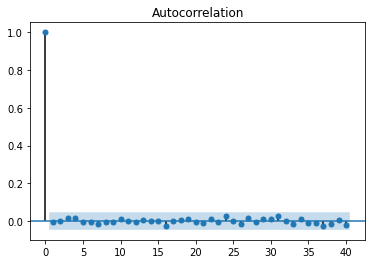

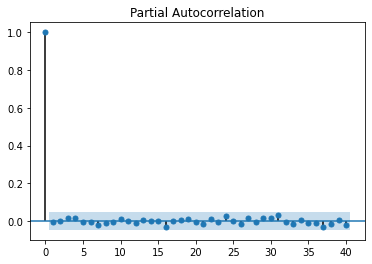

In [22]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as tsaplots

tsaplots.plot_acf(df_oil["Oil Investments"].astype(float),lags = 40)
tsaplots.plot_pacf(df_oil["Oil Investments"].astype(float),lags = 40)

In [23]:
minLagNum = 1
maxLagNum = 1460
df_oil = df_oil.sort_values(["Date"])
for column in df_oil.columns:
    for lag in range(minLagNum,maxLagNum+1):
        df_oil[f"{column}Lag_{lag}"] = df_oil[f"{column}"].shift(lag)

df_oil.head(5)        

Date  Oil Investments  DateLag_1  DateLag_2  DateLag_3  DateLag_4  \
0 2009-12-31         0.025417        NaT        NaT        NaT        NaT   
1 2010-01-04         0.012942 2009-12-31        NaT        NaT        NaT   
2 2010-01-06        -0.017568 2010-01-04 2009-12-31        NaT        NaT   
3 2010-01-07        -0.034925 2010-01-06 2010-01-04 2009-12-31        NaT   
4 2010-01-11         0.018293 2010-01-07 2010-01-06 2010-01-04 2009-12-31   

  DateLag_5 DateLag_6 DateLag_7 DateLag_8  ... Oil InvestmentsLag_1451  \
0       NaT       NaT       NaT       NaT  ...                     NaN   
1       NaT       NaT       NaT       NaT  ...                     NaN   
2       NaT       NaT       NaT       NaT  ...                     NaN   
3       NaT       NaT       NaT       NaT  ...                     NaN   
4       NaT       NaT       NaT       NaT  ...                     NaN   

  Oil InvestmentsLag_1452 Oil InvestmentsLag_1453 Oil InvestmentsLag_1454  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

  Oil InvestmentsLag_1455 Oil InvestmentsLag_1456 Oil InvestmentsLag_1457  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     NaN                     NaN                     NaN   
3                     NaN                     NaN                     NaN   
4                     NaN                     NaN                     NaN   

  Oil InvestmentsLag_1458 Oil InvestmentsLag_1459 Oil InvestmentsLag_1460  
0                     NaN                     NaN                     NaN  
1                     NaN                     NaN                     NaN  
2                     NaN                     NaN                     NaN  
3                     NaN                     NaN                     NaN  
4                     NaN                     NaN                     NaN  

[5 rows x 2922 columns]

In [24]:
# Sort by date
df_oil = df_oil.sort_values(["Date"])

df_oil = df_oil.dropna()

final_vars = [col for col in df_oil.columns if(col.find("Lag")!=1) & (col.find("Date")==-1)]

dep_var = "Oil Investments"

final_vars.append(dep_var)

df_oil_copy = df_oil

df_oil = df_oil[final_vars]

## Training, Validation & Testing

In [25]:
# Spliting the data into train & test
test_percent = 0.20
no_test_obs = int(np.round(test_percent*len(df_oil)))
training = df_oil[:-no_test_obs]
testing = df_oil[-no_test_obs:]

# Breaking testing data into validation and out of sample data
validation_percent = .80
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:no_validation_obs]
outofSample = testing[-no_validation_obs:]

## Data Normalization

In [26]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
trainNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.transform(validation.values)
outofSampleNormal = normalizer.transform(outofSample.values)

## Rescaling Normalized data

In [27]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
trainMinmax = min_max_scaler.fit_transform(trainNormal)
valMinmax = min_max_scaler.transform(validationNormal)
outSampleMinmax = min_max_scaler.transform(outofSampleNormal)

In [28]:
# breaking the data independent variables (x) and dependent variable (y)

# training independent & dependent
trainMinmax_x, trainMinmax_y = trainMinmax[:,:-1],trainMinmax[:,-1]

# validation independent & dependent
valMinmax_x,valMinmax_y = valMinmax[:,:-1],valMinmax[:,-1]

#out of sample testing independent & dependent
outSampleMinmax_x, outSampleMinmax_y = outSampleMinmax[:,:-1],outSampleMinmax[:,-1]

In [29]:
from sklearn.metrics import mean_squared_error
import statsmodels.tsa.stattools
import statsmodels.api as sm

p=1
d=0
q=1

P=1
D=0
Q=1
M=2

myorder =(p,d,q)
myseasonalorder = (P,D,Q,M)
model = sm.tsa.statespace.SARIMAX(trainMinmax_y,
                                 order=myorder,
                                 seasonal_order=myseasonalorder,
                                 trend="c")
model_fit = model.fit()

total_preds = len(testing)
sarimaPred = model_fit.predict(start=2, end=total_preds)

In [30]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(["Actual","Predicted"])
    plt.title(f"{method} (MSE: {mse})")
    plt.show

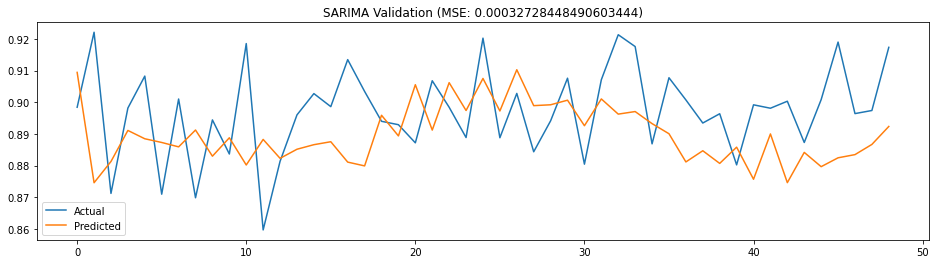

In [31]:
plot_results(valMinmax_y,sarimaPred[:len(valMinmax_y)],"SARIMA Validation",range(len(valMinmax_y)))
#plot_results(outSampleMinmax_y,sarimaPred[len(valMinmax_y):],"SARIMA Testing",range(len(outSampleMinmax_y)))

## CNN

In [32]:
from numpy import array

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the data
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)    

def mean_squared_error(actual, predicted):
    sum_square_error = 0.0
    for i in range(len(actual)):
        sum_square_error += (actual[i] - predicted[i])**2.0
    mean_square_error = 1.0 / len(actual) * sum_square_error
    return mean_square_error

In [33]:
n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in, n_steps_out)
validationSeq_x, validationSeq_y = split_sequences(valMinmax,n_steps_in, n_steps_out)
outSampleSeq_x, outSampleSeq_y = split_sequences(outSampleMinmax,n_steps_in,n_steps_out)

In [34]:
trainMinmax.shape

(245, 1462)

In [35]:
trainSeq_x.shape

(244, 2, 1461)

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D, AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2 
import random as rn

In [37]:
np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

X,y = split_sequences(trainMinmax,n_steps_in,n_steps_out)
n_features = X.shape[2]
np.random.seed(0)

model = Sequential()

model.add(Conv1D(filters=5,
                kernel_size=2,
                strides=2,
                activation="linear",
                input_shape=(n_steps_in, n_features)))

model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1,
               activation="tanh",
               kernel_regularizer=l2(0.01)))

model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))
model.summary()

Epoch 1/10000
3/3 - 0s - loss: 0.5269 - val_loss: 0.0206
Epoch 2/10000
3/3 - 0s - loss: 0.0257 - val_loss: 0.0206
Epoch 3/10000
3/3 - 0s - loss: 0.0257 - val_loss: 0.0206
Epoch 4/10000
3/3 - 0s - loss: 0.0257 - val_loss: 0.0206
Epoch 5/10000
3/3 - 0s - loss: 0.0257 - val_loss: 0.0205
Epoch 6/10000
3/3 - 0s - loss: 0.0257 - val_loss: 0.0205
Epoch 7/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 8/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 9/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 10/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 11/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 12/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 13/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0205
Epoch 14/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0204
Epoch 15/10000
3/3 - 0s - loss: 0.0256 - val_loss: 0.0204
Epoch 16/10000
3/3 - 0s - loss: 0.0255 - val_loss: 0.0204
Epoch 17/10000
3/3 - 0s - loss: 0.0255 - val_loss: 0.0204
Epoch 18/10000
3/3 - 0s

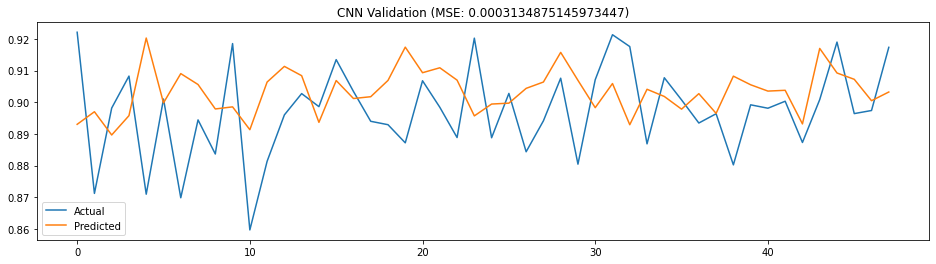

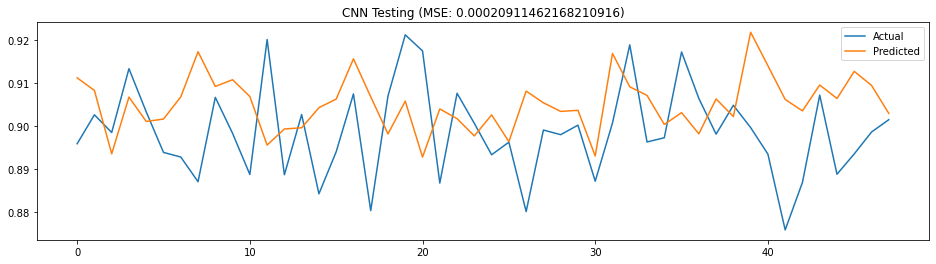

In [38]:
cnnValPred = model.predict(validationSeq_x)

cnnOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y,cnnValPred, "CNN Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y,cnnOutSamplePred, "CNN Testing",range(len(outSampleSeq_y)))

In [39]:
from keras.layers import LSTM

np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

validationSeq_x, validationSeq_y = split_sequences(valMinmax, n_steps_in, n_steps_out)

outSampleSeq_x, validation_y=split_sequences(outSampleMinmax, n_steps_in, n_steps_out)

X_useless, y_yseless = split_sequences(valMinmax, n_steps_in, n_steps_out)

n_features = X_useless.shape[2]
np.random.seed(0);print(np.random.rand(4))

model = Sequential()

model.add(LSTM(300,
               input_shape = (n_steps_in, n_features),
               activation="tanh"))

model.add(Dropout(0.1))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/10000
3/3 - 0s - loss: 1.1180 - val_loss: 0.2388
Epoch 2/10000
3/3 - 0s - loss: 0.1437 - val_loss: 0.0062
Epoch 3/10000
3/3 - 0s - loss: 0.0186 - val_loss: 0.0048
Epoch 4/10000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0051
Epoch 5/10000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0044
Epoch 6/10000
3/3 - 0s - loss: 0.0158 - val_loss: 0.0057
Epoch 7/10000
3/3 - 0s - loss: 0.0156 - val_loss: 0.0047
Epoch 8/10000
3/3 - 0s - loss: 0.0171 - val_loss: 0.0063
Epoch 9/10000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0042
Epoch 10/10000
3/3 - 0s - loss: 0.0148 - val_loss: 0.0046
Epoch 11/10000
3/3 - 0s - loss: 0.0163 - val_loss: 0.0051
Epoch 12/10000
3/3 - 0s - loss: 0.0154 - val_loss: 0.0057
Epoch 13/10000
3/3 - 0s - loss: 0.0144 - val_loss: 0.0050
Epoch 14/10000
3/3 - 0s - loss: 0.0140 - val_loss: 0.0051
Epoch 15/10000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0045
Epoch 16/10000
3/3 - 0s - loss: 0.0162 - val_loss: 0.0044
Epoch 17/10000
3/3 - 0s - loss: 0.0

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               2114400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 301       
Total params: 2,114,701
Trainable params: 2,114,701
Non-trainable params: 0
_________________________________________________________________


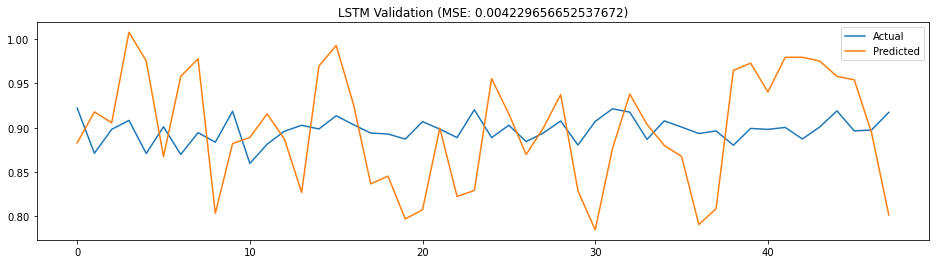

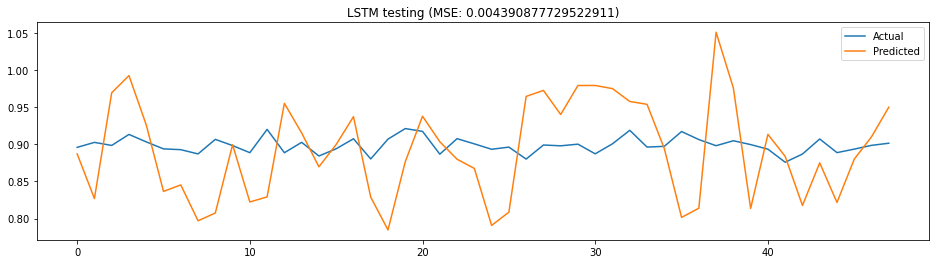

In [41]:
lstmValPred = model.predict(validationSeq_x)

lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y, lstmValPred, "LSTM Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y, lstmOutSamplePred, "LSTM testing",range(len(outSampleSeq_y)))

# Saving a Neural Network Model to use it later

In [42]:
import os
dirName = f"C:\\Users\\vyasd\\OneDrive\\New folder (2)\\Desktop\\Internship Flip Robo\\company stock time series\\output"

try:
    os.mkdir(dirName)
    print("Directory " , dirName, "Created")
except FileExistsError:
    print("Directory" , dirName, "Already exists")
    
    
os.chdir(dirName)

model_name = "lstm"
filename = f"{model_name}_model.h5"
model.save(filename)

Directory C:\Users\vyasd\OneDrive\New folder (2)\Desktop\Internship Flip Robo\company stock time series\output Already exists


## Calling a Saved Model

In [43]:
import keras

model_name="lstm"
filename = f"{model_name}_model.h5"
saved_model = keras.models.load_model(filename)

yhat = saved_model.predict(outSampleSeq_x)
mse = mean_squared_error(outSampleSeq_y,cnnOutSamplePred)
print(mse)

0.00020911462168210916


## Invert the Scaling

In [44]:
from numpy import concatenate

def invert_scaling(x_minmax,y_predicted, n_steps_in):
    reshaped_pred = y_predicted.reshape((y_predicted.shape[0],1))
    matrix = concatenate((x_minmax[n_steps_in-1:],reshaped_pred),axis=1)
    matrix_min_max_invert = min_max_scaler.inverse_transform(matrix)
    matrix_min_max_normal = normalizer.inverse_transform(matrix_min_max_invert)
    inv_pred = matrix_min_max_normal[:,-1]
    return inv_pred

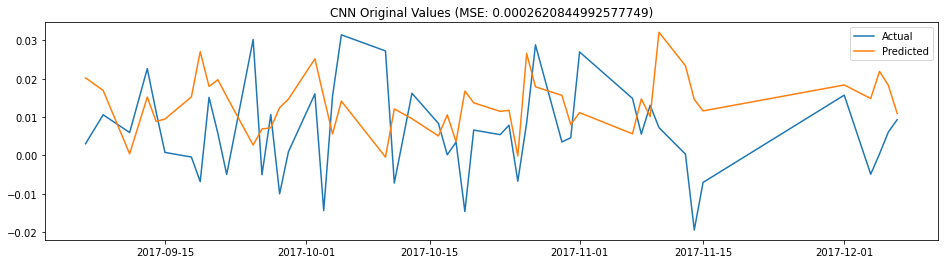

In [45]:
inv_yhat = invert_scaling(outSampleMinmax_x,cnnOutSamplePred,n_steps_in)
plot_results(df_oil_copy["Oil Investments"][-(no_validation_obs-n_steps_in+1):].values,
             inv_yhat,
             "CNN Original Values",
             df_oil_copy["Date"][-(no_validation_obs-n_steps_in+1):])

# Model 2 Gold Investments

In [46]:
df_gold = df.groupby("Date")["Gold Investments"].sum().reset_index()
df_gold.head()

Date  Gold Investments
0 2009-12-31          0.000150
1 2010-01-04          0.007172
2 2010-01-06          0.016770
3 2010-01-07         -0.008039
4 2010-01-11          0.005755

In [47]:
df_gold.shape

(1766, 2)

In [48]:
df_gold.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [49]:
df_gold.index

RangeIndex(start=0, stop=1766, step=1)

In [50]:
import plotly.express as px
fig = px.line(df_gold, x='Date', y='Gold Investments', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Checking data is Stationary

In [51]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12

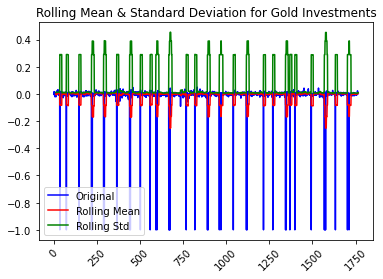

Results of Dickey-Fuller Test:
Test Statistics              -1.268266e+01
p-value                       1.177754e-23
# Lags Used                   8.000000e+00
Number of Observation Used    1.757000e+03
Critical Value (1%)          -3.434077e+00
Critical Value (5%)          -2.863186e+00
Critical Value (10%)         -2.567646e+00
dtype: float64


In [52]:
def test_stationarity(df_gold, ts):
    
    # Determin Rolling Statistics
    rolmean = df_gold["Gold Investments"].rolling(window = 12, center = False).mean()
    rolstd = df_gold["Gold Investments"].rolling(window = 12,center = False).std()
    
    # Plot rolling statistics
    orig = plt.plot(df_gold["Gold Investments"], color="blue",label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="green", label="Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation for %s" %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    
    # Perform Dickey-Fuller test:
    # Null Hpyothesis (H_0): Time series is not Stationary
    #Alternate Hypothesis (H_1): Time series is Stationary
    
    print("Results of Dickey-Fuller Test:")
    df_gold_test = statsmodels.tsa.stattools.adfuller(df_gold["Gold Investments"], autolag="AIC")
    
    df_gold_output = pd.Series(df_gold_test[0:4], index = ["Test Statistics","p-value","# Lags Used", "Number of Observation Used"])
    
    for key, value in df_gold_test[4].items():
        df_gold_output["Critical Value (%s)"%key] = value
    print(df_gold_output)

# Appplying th function to out Y variable: Oil Investments
test_stationarity(df_gold,"Gold Investments")

### Data is not stationary

### We have to change the data type of Date column because data is not stationary, we will make it Stationary from below code

In [53]:
df_gold["Date"] = df_gold["Date"].values.astype("float")

In [54]:
def percentChange(x,numLags):
    y =(x - x.shift(numLags))/x.shift(numLags)
    return y

df_gold_new = pd.DataFrame()
df_gold_new["Date"] = df_gold["Date"]

levelVars = df_gold.columns[:-1]
for levelVar in levelVars:
    df_gold_new[f'{levelVar}Ret'] = percentChange(df_gold[levelVar],1)
    
df_gold_new = df_gold_new[1:]    
    

test_stationarity(df_gold_new,"Date")
#test_stationarity(df_gold_new,"Gold Investments")

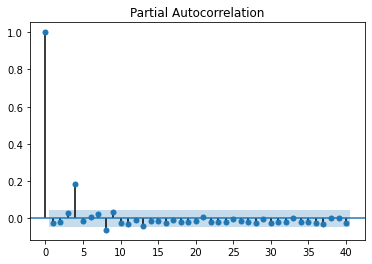

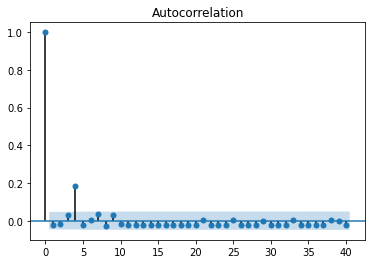

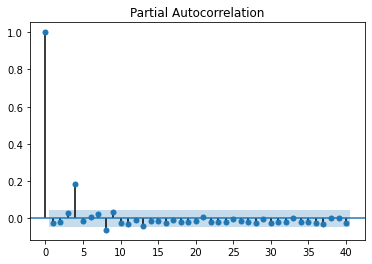

In [55]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as tsaplots

tsaplots.plot_acf(df_gold["Gold Investments"].astype(float),lags = 40)
tsaplots.plot_pacf(df_gold["Gold Investments"].astype(float),lags = 40)

In [56]:
minLagNum = 1
maxLagNum = 1460
df_oil = df_gold.sort_values(["Date"])
for column in df_gold.columns:
    for lag in range(minLagNum,maxLagNum+1):
        df_gold[f"{column}Lag_{lag}"] = df_gold[f"{column}"].shift(lag)

df_gold.head(5)        

Date  Gold Investments     DateLag_1     DateLag_2     DateLag_3  \
0  1.262218e+18          0.000150           NaN           NaN           NaN   
1  1.262563e+18          0.007172  1.262218e+18           NaN           NaN   
2  1.262736e+18          0.016770  1.262563e+18  1.262218e+18           NaN   
3  1.262822e+18         -0.008039  1.262736e+18  1.262563e+18  1.262218e+18   
4  1.263168e+18          0.005755  1.262822e+18  1.262736e+18  1.262563e+18   

      DateLag_4  DateLag_5  DateLag_6  DateLag_7  DateLag_8  ...  \
0           NaN        NaN        NaN        NaN        NaN  ...   
1           NaN        NaN        NaN        NaN        NaN  ...   
2           NaN        NaN        NaN        NaN        NaN  ...   
3           NaN        NaN        NaN        NaN        NaN  ...   
4  1.262218e+18        NaN        NaN        NaN        NaN  ...   

   Gold InvestmentsLag_1451  Gold InvestmentsLag_1452  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   Gold InvestmentsLag_1453  Gold InvestmentsLag_1454  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   Gold InvestmentsLag_1455  Gold InvestmentsLag_1456  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   Gold InvestmentsLag_1457  Gold InvestmentsLag_1458  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   Gold InvestmentsLag_1459  Gold InvestmentsLag_1460  
0                       NaN                       NaN  
1                       NaN                       NaN  
2                       NaN                       NaN  
3                       NaN                       NaN  
4                       NaN                       NaN  

[5 rows x 2922 columns]

In [57]:
# Sort by date
df_gold = df_gold.sort_values(["Date"])

df_gold = df_gold.dropna()

final_vars = [col for col in df_gold.columns if(col.find("Lag")!=1) & (col.find("Date")==-1)]

dep_var = "Gold Investments"

final_vars.append(dep_var)

df_gold_copy = df_gold

df_gold = df_gold[final_vars]

## Training, Validation & Testing

In [58]:
# Spliting the data intop train & test
test_percent = 0.20
no_test_obs = int(np.round(test_percent*len(df_gold)))
training = df_gold[:-no_test_obs]
testing = df_gold[-no_test_obs:]

# Breaking testing data into validation and out of sample data
validation_percent = .80
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:no_validation_obs]
outofSample = testing[-no_validation_obs:]

### Data Normalization

In [59]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
trainNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.transform(validation.values)
outofSampleNormal = normalizer.transform(outofSample.values)

### Rescaling Normalized data

In [60]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
trainMinmax = min_max_scaler.fit_transform(trainNormal)
valMinmax = min_max_scaler.transform(validationNormal)
outSampleMinmax = min_max_scaler.transform(outofSampleNormal)

In [61]:
# breaking the data independent variables (x) and dependent variable (y)

# training independent & dependent
trainMinmax_x, trainMinmax_y = trainMinmax[:,:-1],trainMinmax[:,-1]

# validation independent & dependent
valMinmax_x,valMinmax_y = valMinmax[:,:-1],valMinmax[:,-1]

#out of sample testing independent & dependent
outSampleMinmax_x, outSampleMinmax_y = outSampleMinmax[:,:-1],outSampleMinmax[:,-1]

In [62]:
from sklearn.metrics import mean_squared_error
import statsmodels.tsa.stattools
import statsmodels.api as sm

p=1
d=1
q=1

P=1
D=0
Q=1
M=2

myorder =(p,d,q)
myseasonalorder = (P,D,Q,M)
model = sm.tsa.statespace.SARIMAX(trainMinmax_y,
                                 order=myorder,
                                 seasonal_order=myseasonalorder,
                                 trend="c")
model_fit = model.fit()

total_preds = len(testing)
sarimaPred = model_fit.predict(start=2, end=total_preds)

In [63]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(["Actual","Predicted"])
    plt.title(f"{method} (MSE: {mse})")
    plt.show

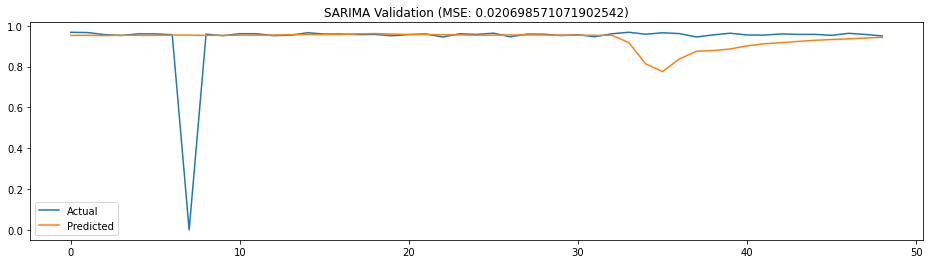

In [64]:
plot_results(valMinmax_y,sarimaPred[:len(valMinmax_y)],"SARIMA Validation",range(len(valMinmax_y)))
#plot_results(outSampleMinmax_y,sarimaPred[len(valMinmax_y):],"SARIMA Testing",range(len(outSampleMinmax_y)))

## CNN

In [65]:
from numpy import array

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the data
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)    

In [66]:
n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in, n_steps_out)
validationSeq_x, validationSeq_y = split_sequences(valMinmax,n_steps_in, n_steps_out)
outSampleSeq_x, outSampleSeq_y = split_sequences(outSampleMinmax,n_steps_in,n_steps_out)

In [67]:
np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

X,y = split_sequences(trainMinmax,n_steps_in,n_steps_out)
n_features = X.shape[2]
np.random.seed(0)

model = Sequential()

model.add(Conv1D(filters=5,
                kernel_size=2,
                strides=2,
                activation="linear",
                input_shape=(n_steps_in, n_features)))

model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1,
               activation="tanh",
               kernel_regularizer=l2(0.01)))

model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))
model.summary()

Epoch 1/10000
3/3 - 0s - loss: 0.3205 - val_loss: 0.0326
Epoch 2/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0326
Epoch 3/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 4/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 5/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 6/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 7/10000
3/3 - 0s - loss: 0.0362 - val_loss: 0.0325
Epoch 8/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0325
Epoch 9/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0325
Epoch 10/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0325
Epoch 11/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0325
Epoch 12/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0324
Epoch 13/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0324
Epoch 14/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0324
Epoch 15/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0324
Epoch 16/10000
3/3 - 0s - loss: 0.0360 - val_loss: 0.0324
Epoch 17/10000
3/3 - 0s - loss: 0.0360 - val_loss: 0.0324
Epoch 18/10000
3/3 - 0s

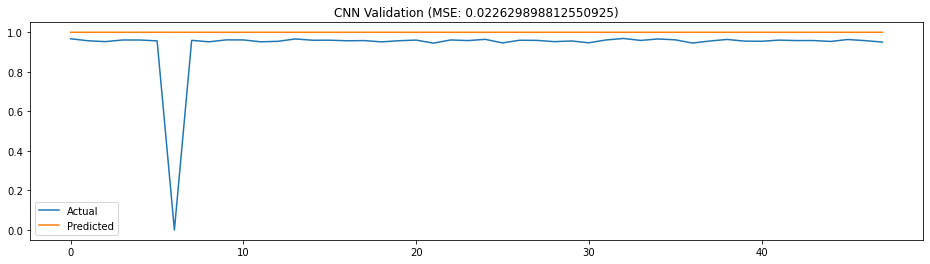

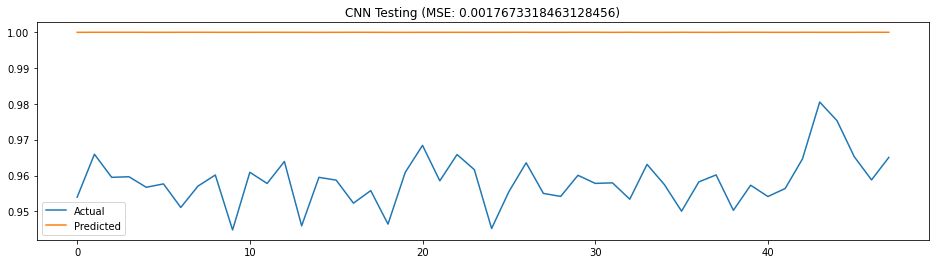

In [68]:
cnnValPred = model.predict(validationSeq_x)

cnnOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y,cnnValPred, "CNN Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y,cnnOutSamplePred, "CNN Testing",range(len(outSampleSeq_y)))

In [69]:
from keras.layers import LSTM

np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

validationSeq_x, validationSeq_y = split_sequences(valMinmax, n_steps_in, n_steps_out)

outSampleSeq_x, validation_y=split_sequences(outSampleMinmax, n_steps_in, n_steps_out)

X_useless, y_yseless = split_sequences(valMinmax, n_steps_in, n_steps_out)

n_features = X_useless.shape[2]
np.random.seed(0);print(np.random.rand(4))

model = Sequential()

model.add(LSTM(300,
               input_shape = (n_steps_in, n_features),
               activation="tanh"))

model.add(Dropout(0.1))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/10000
3/3 - 1s - loss: 4.5457 - val_loss: 0.2956
Epoch 2/10000
3/3 - 0s - loss: 0.1441 - val_loss: 0.0199
Epoch 3/10000
3/3 - 0s - loss: 0.0329 - val_loss: 0.0202
Epoch 4/10000
3/3 - 0s - loss: 0.0317 - val_loss: 0.0198
Epoch 5/10000
3/3 - 0s - loss: 0.0294 - val_loss: 0.0204
Epoch 6/10000
3/3 - 0s - loss: 0.0311 - val_loss: 0.0198
Epoch 7/10000
3/3 - 0s - loss: 0.0361 - val_loss: 0.0197
Epoch 8/10000
3/3 - 0s - loss: 0.0316 - val_loss: 0.0200
Epoch 9/10000
3/3 - 0s - loss: 0.0348 - val_loss: 0.0197
Epoch 10/10000
3/3 - 0s - loss: 0.0321 - val_loss: 0.0197
Epoch 11/10000
3/3 - 0s - loss: 0.0326 - val_loss: 0.0197
Epoch 12/10000
3/3 - 0s - loss: 0.0303 - val_loss: 0.0199
Epoch 13/10000
3/3 - 0s - loss: 0.0297 - val_loss: 0.0197
Epoch 14/10000
3/3 - 0s - loss: 0.0329 - val_loss: 0.0197
Epoch 15/10000
3/3 - 0s - loss: 0.0300 - val_loss: 0.0198
Epoch 16/10000
3/3 - 0s - loss: 0.0320 - val_loss: 0.0201
Epoch 17/10000
3/3 - 0s - loss: 0.0

In [70]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 300)               2114400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 2,114,701
Trainable params: 2,114,701
Non-trainable params: 0
_________________________________________________________________


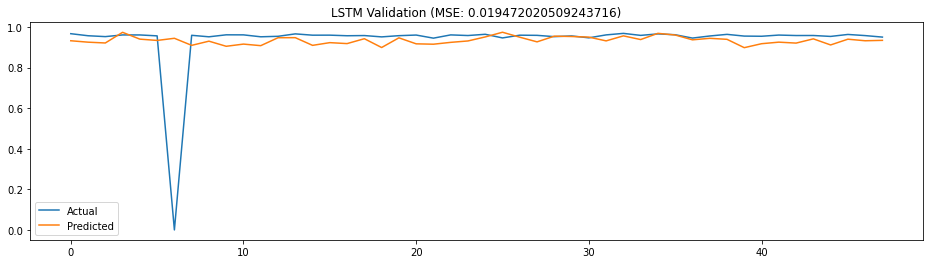

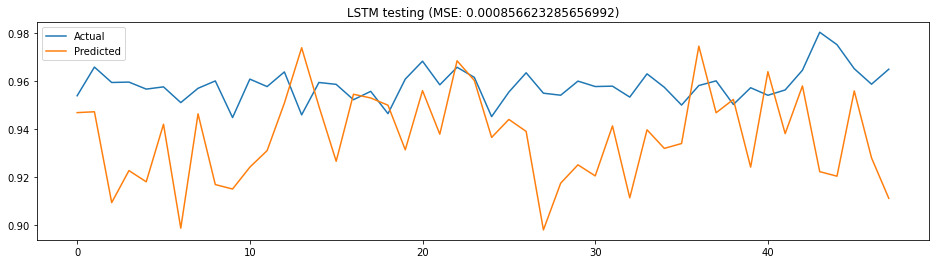

In [71]:
lstmValPred = model.predict(validationSeq_x)

lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y, lstmValPred, "LSTM Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y, lstmOutSamplePred, "LSTM testing",range(len(outSampleSeq_y)))

## Saving a Neural Network Model to use it later

In [72]:
import os
dirName = f"C:\\Users\\vyasd\\OneDrive\\New folder (2)\\Desktop\\Internship Flip Robo\\company stock time series\\output"

try:
    os.mkdir(dirName)
    print("Directory " , dirName, "Created")
except FileExistsError:
    print("Directory" , dirName, "Already exists")
    
    
os.chdir(dirName)

model_name = "lstm"
filename = f"{model_name}_model.h6"
model.save(filename)

Directory C:\Users\vyasd\OneDrive\New folder (2)\Desktop\Internship Flip Robo\company stock time series\output Already exists
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: lstm_model.h6\assets


## Calling a Saved Model

In [73]:
import keras

model_name="lstm"
filename = f"{model_name}_model.h6"
saved_model = keras.models.load_model(filename)

yhat = saved_model.predict(outSampleSeq_x)
mse = mean_squared_error(outSampleSeq_y,cnnOutSamplePred)
print(mse)

0.0017673318463128456


## Invert the Scaling

In [74]:
from numpy import concatenate

def invert_scaling(x_minmax,y_predicted, n_steps_in):
    reshaped_pred = y_predicted.reshape((y_predicted.shape[0],1))
    matrix = concatenate((x_minmax[n_steps_in-1:],reshaped_pred),axis=1)
    matrix_min_max_invert = min_max_scaler.inverse_transform(matrix)
    matrix_min_max_normal = normalizer.inverse_transform(matrix_min_max_invert)
    inv_pred = matrix_min_max_normal[:,-1]
    return inv_pred

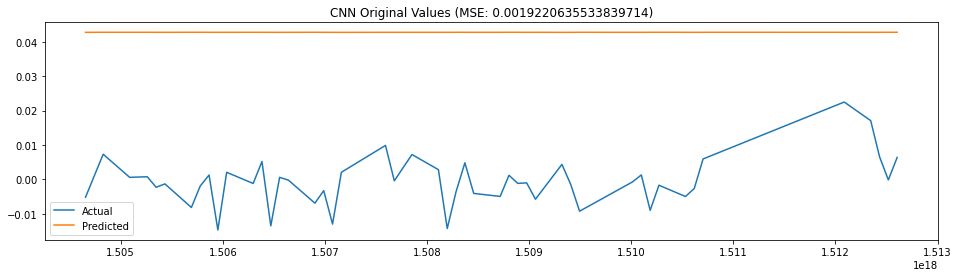

In [75]:
inv_yhat = invert_scaling(outSampleMinmax_x,cnnOutSamplePred,n_steps_in)
plot_results(df_gold_copy["Gold Investments"][-(no_validation_obs-n_steps_in+1):].values,
             inv_yhat,
             "CNN Original Values",
             df_gold_copy["Date"][-(no_validation_obs-n_steps_in+1):])

# Model 3 Comp Stock

In [76]:
df_comp = df.groupby("Date")["Comp Stock"].sum().reset_index()
df_comp.head()

Date  Comp Stock
0 2009-12-31    0.017354
1 2010-01-04    0.004128
2 2010-01-06    0.015377
3 2010-01-07   -0.012126
4 2010-01-11    0.010632

In [77]:
df_comp.shape

(1766, 2)

In [78]:
df_comp.isnull().sum()

Date          0
Comp Stock    0
dtype: int64

In [79]:
df_comp.index

RangeIndex(start=0, stop=1766, step=1)

In [80]:
import plotly.express as px
fig = px.line(df_comp, x='Date', y='Comp Stock', title='Time Series with Rangeslider')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## Checking data is Stationary

In [81]:
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.x13
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12

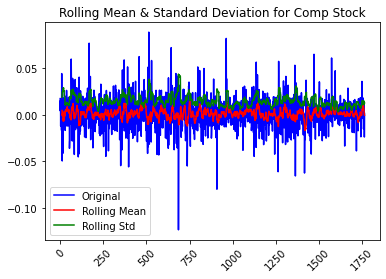

Results of Dickey-Fuller Test:
Test Statistics                -40.438264
p-value                          0.000000
# Lags Used                      0.000000
Number of Observation Used    1765.000000
Critical Value (1%)             -3.434060
Critical Value (5%)             -2.863179
Critical Value (10%)            -2.567643
dtype: float64


In [82]:
def test_stationarity(df_comp, ts):
    
    # Determin Rolling Statistics
    rolmean = df_comp["Comp Stock"].rolling(window = 12, center = False).mean()
    rolstd = df_comp["Comp Stock"].rolling(window = 12,center = False).std()
    
    # Plot rolling statistics
    orig = plt.plot(df_comp["Comp Stock"], color="blue",label="Original")
    mean = plt.plot(rolmean, color="red", label="Rolling Mean")
    std = plt.plot(rolstd, color="green", label="Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean & Standard Deviation for %s" %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    
    # Perform Dickey-Fuller test:
    # Null Hpyothesis (H_0): Time series is not Stationary
    #Alternate Hypothesis (H_1): Time series is Stationary
    
    print("Results of Dickey-Fuller Test:")
    df_comp_test = statsmodels.tsa.stattools.adfuller(df_comp["Comp Stock"], autolag="AIC")
    
    df_comp_output = pd.Series(df_comp_test[0:4], index = ["Test Statistics","p-value","# Lags Used", "Number of Observation Used"])
    
    for key, value in df_comp_test[4].items():
        df_comp_output["Critical Value (%s)"%key] = value
    print(df_comp_output)

# Appplying th function to out Y variable: Oil Investments
test_stationarity(df_comp,"Comp Stock")

## Data is not stationary

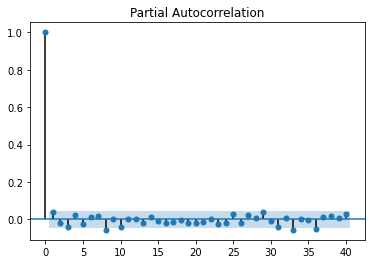

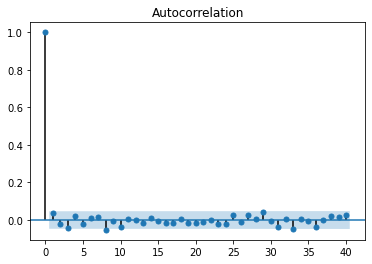

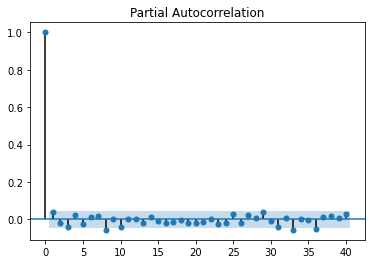

In [83]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.graphics.tsaplots as tsaplots

tsaplots.plot_acf(df_comp["Comp Stock"].astype(float),lags = 40)
tsaplots.plot_pacf(df_comp["Comp Stock"].astype(float),lags = 40)

In [84]:
minLagNum = 1
maxLagNum = 1460
df_comp = df_comp.sort_values(["Date"])
for column in df_comp.columns:
    for lag in range(minLagNum,maxLagNum+1):
        df_comp[f"{column}Lag_{lag}"] = df_comp[f"{column}"].shift(lag)

df_comp.head(5)        

Date  Comp Stock  DateLag_1  DateLag_2  DateLag_3  DateLag_4  \
0 2009-12-31    0.017354        NaT        NaT        NaT        NaT   
1 2010-01-04    0.004128 2009-12-31        NaT        NaT        NaT   
2 2010-01-06    0.015377 2010-01-04 2009-12-31        NaT        NaT   
3 2010-01-07   -0.012126 2010-01-06 2010-01-04 2009-12-31        NaT   
4 2010-01-11    0.010632 2010-01-07 2010-01-06 2010-01-04 2009-12-31   

  DateLag_5 DateLag_6 DateLag_7 DateLag_8  ... Comp StockLag_1451  \
0       NaT       NaT       NaT       NaT  ...                NaN   
1       NaT       NaT       NaT       NaT  ...                NaN   
2       NaT       NaT       NaT       NaT  ...                NaN   
3       NaT       NaT       NaT       NaT  ...                NaN   
4       NaT       NaT       NaT       NaT  ...                NaN   

  Comp StockLag_1452 Comp StockLag_1453 Comp StockLag_1454 Comp StockLag_1455  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  Comp StockLag_1456 Comp StockLag_1457 Comp StockLag_1458 Comp StockLag_1459  \
0                NaN                NaN                NaN                NaN   
1                NaN                NaN                NaN                NaN   
2                NaN                NaN                NaN                NaN   
3                NaN                NaN                NaN                NaN   
4                NaN                NaN                NaN                NaN   

  Comp StockLag_1460  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 2922 columns]

In [85]:
# Sort by date
df_comp = df_comp.sort_values(["Date"])

df_comp = df_comp.dropna()

final_vars = [col for col in df_comp.columns if(col.find("Lag")!=1) & (col.find("Date")==-1)]

dep_var = "Comp Stock"

final_vars.append(dep_var)

df_comp_copy = df_comp

df_comp = df_comp[final_vars]

## Training, Validation & Testing

In [86]:
# Spliting the data intop train & test
test_percent = 0.20
no_test_obs = int(np.round(test_percent*len(df_comp)))
training = df_comp[:-no_test_obs]
testing = df_comp[-no_test_obs:]

# Breaking testing data into validation and out of sample data
validation_percent = .80
no_validation_obs = int(np.round(validation_percent*len(testing)))
validation = testing[:no_validation_obs]
outofSample = testing[-no_validation_obs:]


## Data Normalization

In [87]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
trainNormal = normalizer.fit_transform(training.values)
validationNormal = normalizer.transform(validation.values)
outofSampleNormal = normalizer.transform(outofSample.values)

## Rescaling Normalized data

In [88]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
trainMinmax = min_max_scaler.fit_transform(trainNormal)
valMinmax = min_max_scaler.transform(validationNormal)
outSampleMinmax = min_max_scaler.transform(outofSampleNormal)

In [89]:
# breaking the data independent variables (x) and dependent variable (y)

# training independent & dependent
trainMinmax_x, trainMinmax_y = trainMinmax[:,:-1],trainMinmax[:,-1]

# validation independent & dependent
valMinmax_x,valMinmax_y = valMinmax[:,:-1],valMinmax[:,-1]

#out of sample testing independent & dependent
outSampleMinmax_x, outSampleMinmax_y = outSampleMinmax[:,:-1],outSampleMinmax[:,-1]

In [90]:
from sklearn.metrics import mean_squared_error
import statsmodels.tsa.stattools
import statsmodels.api as sm

p=1
d=0
q=1

P=1
D=0
Q=1
M=13

myorder =(p,d,q)
myseasonalorder = (P,D,Q,M)
model = sm.tsa.statespace.SARIMAX(trainMinmax_y,
                                 order=myorder,
                                 seasonal_order=myseasonalorder,
                                 trend="c")
model_fit = model.fit()

total_preds = len(testing)
sarimaPred = model_fit.predict(start=1, end=total_preds)

In [91]:
def plot_results(actual_y,predicted_y,method,date):
    mse = mean_squared_error(actual_y,predicted_y)
    
    plt.figure(figsize=(16,4))
    plt.plot(date,actual_y)
    plt.plot(date,predicted_y)
    plt.legend(["Actual","Predicted"])
    plt.title(f"{method} (MSE: {mse})")
    plt.show

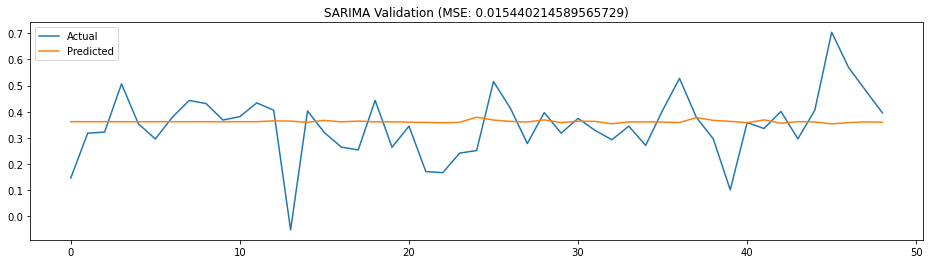

In [92]:
plot_results(valMinmax_y,sarimaPred[:len(valMinmax_y)],"SARIMA Validation",range(len(valMinmax_y)))
#plot_results(outSampleMinmax_y,sarimaPred[len(valMinmax_y):],"SARIMA Testing",range(len(outSampleMinmax_y)))

## CNN

In [93]:
from numpy import array

def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        #find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the data
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)    

In [94]:
n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in, n_steps_out)
validationSeq_x, validationSeq_y = split_sequences(valMinmax,n_steps_in, n_steps_out)
outSampleSeq_x, outSampleSeq_y = split_sequences(outSampleMinmax,n_steps_in,n_steps_out)

In [95]:
trainMinmax.shape

(245, 1462)

In [96]:
trainSeq_x.shape

(244, 2, 1461)

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, AveragePooling1D,MaxPooling1D
from keras.layers import Conv1D, AveragePooling1D,MaxPooling1D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD, Nadam
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2 
import random as rn

In [98]:
np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

X,y = split_sequences(trainMinmax,n_steps_in,n_steps_out)
n_features = X.shape[2]
np.random.seed(0)

model = Sequential()

model.add(Conv1D(filters=5,
                kernel_size=2,
                strides=2,
                activation="linear",
                input_shape=(n_steps_in, n_features)))

model.add(MaxPooling1D(pool_size=1))

model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1,
               activation="tanh",
               kernel_regularizer=l2(0.01)))

model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))
model.summary()

Epoch 1/10000
3/3 - 0s - loss: 0.3002 - val_loss: 0.4339
Epoch 2/10000
3/3 - 0s - loss: 0.4058 - val_loss: 0.3795
Epoch 3/10000
3/3 - 0s - loss: 0.4582 - val_loss: 0.4438
Epoch 4/10000
3/3 - 0s - loss: 0.4256 - val_loss: 0.4437
Epoch 5/10000
3/3 - 0s - loss: 0.4236 - val_loss: 0.4436
Epoch 6/10000
3/3 - 0s - loss: 0.4233 - val_loss: 0.4435
Epoch 7/10000
3/3 - 0s - loss: 0.4225 - val_loss: 0.4434
Epoch 8/10000
3/3 - 0s - loss: 0.4225 - val_loss: 0.4432
Epoch 9/10000
3/3 - 0s - loss: 0.4194 - val_loss: 0.4428
Epoch 10/10000
3/3 - 0s - loss: 0.4182 - val_loss: 0.4421
Epoch 11/10000
3/3 - 0s - loss: 0.4193 - val_loss: 0.4412
Epoch 12/10000
3/3 - 0s - loss: 0.4067 - val_loss: 0.4391
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 1, 5)              14615     
_________________________________________________________________
max_pooling1d_2 (MaxPooling

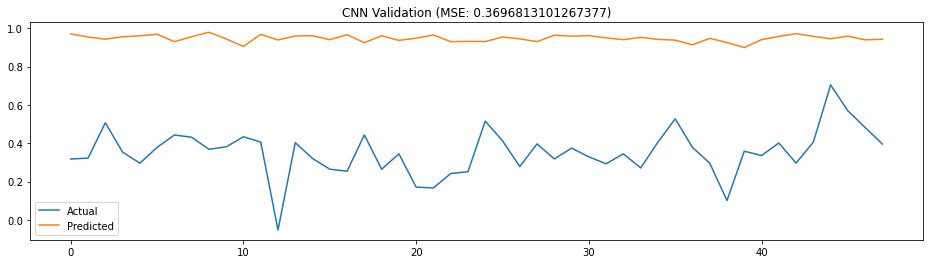

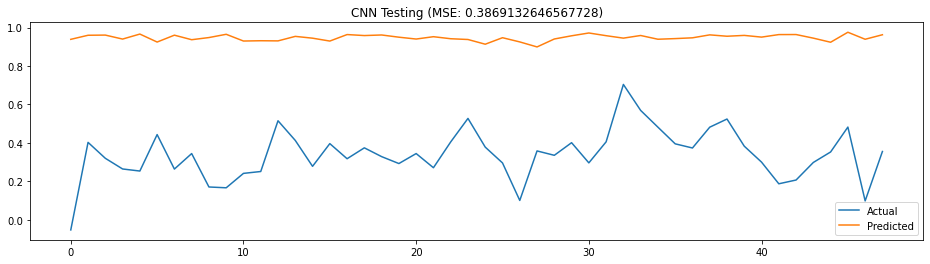

In [99]:
cnnValPred = model.predict(validationSeq_x)

cnnOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y,cnnValPred, "CNN Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y,cnnOutSamplePred, "CNN Testing",range(len(outSampleSeq_y)))

In [100]:
from keras.layers import LSTM

np.random.seed(42)
rn.seed(12345)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.random.set_seed(1234)

sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

EarlyStop = EarlyStopping(monitor="val_loss",patience=10,verbose=0,mode="auto",restore_best_weights=True)
epochs = 10000

bs = 100
lr = 0

sgd = SGD(lr=lr)

n_steps_in = 2
n_steps_out = 1

trainSeq_x, trainSeq_y = split_sequences(trainMinmax, n_steps_in,n_steps_out)

validationSeq_x, validationSeq_y = split_sequences(valMinmax, n_steps_in, n_steps_out)

outSampleSeq_x, validation_y=split_sequences(outSampleMinmax, n_steps_in, n_steps_out)

X_useless, y_yseless = split_sequences(valMinmax, n_steps_in, n_steps_out)

n_features = X_useless.shape[2]
np.random.seed(0);print(np.random.rand(4))

model = Sequential()

model.add(LSTM(300,
               input_shape = (n_steps_in, n_features),
               activation="tanh"))

model.add(Dropout(0.1))
model.add(Dense(1,activation="linear"))
model.compile(loss="mean_squared_error", optimizer="sgd")

model.fit(trainSeq_x,trainSeq_y,
         batch_size=bs,
         epochs=epochs,
         callbacks=[EarlyStop],
         verbose=2,
         shuffle=False,
         validation_data = (validationSeq_x,validationSeq_y))

[0.5488135  0.71518937 0.60276338 0.54488318]
Epoch 1/10000
3/3 - 0s - loss: 0.3251 - val_loss: 0.1466
Epoch 2/10000
3/3 - 0s - loss: 0.1247 - val_loss: 0.0594
Epoch 3/10000
3/3 - 0s - loss: 0.0545 - val_loss: 0.0200
Epoch 4/10000
3/3 - 0s - loss: 0.0273 - val_loss: 0.0213
Epoch 5/10000
3/3 - 0s - loss: 0.0233 - val_loss: 0.0207
Epoch 6/10000
3/3 - 0s - loss: 0.0241 - val_loss: 0.0184
Epoch 7/10000
3/3 - 0s - loss: 0.0262 - val_loss: 0.0198
Epoch 8/10000
3/3 - 0s - loss: 0.0238 - val_loss: 0.0184
Epoch 9/10000
3/3 - 0s - loss: 0.0266 - val_loss: 0.0211
Epoch 10/10000
3/3 - 0s - loss: 0.0249 - val_loss: 0.0185
Epoch 11/10000
3/3 - 0s - loss: 0.0235 - val_loss: 0.0200
Epoch 12/10000
3/3 - 0s - loss: 0.0217 - val_loss: 0.0189
Epoch 13/10000
3/3 - 0s - loss: 0.0219 - val_loss: 0.0186
Epoch 14/10000
3/3 - 0s - loss: 0.0222 - val_loss: 0.0194
Epoch 15/10000
3/3 - 0s - loss: 0.0213 - val_loss: 0.0193
Epoch 16/10000
3/3 - 0s - loss: 0.0226 - val_loss: 0.0187
Epoch 17/10000
3/3 - 0s - loss: 0.0

In [101]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 300)               2114400   
_________________________________________________________________
dropout_5 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 2,114,701
Trainable params: 2,114,701
Non-trainable params: 0
_________________________________________________________________


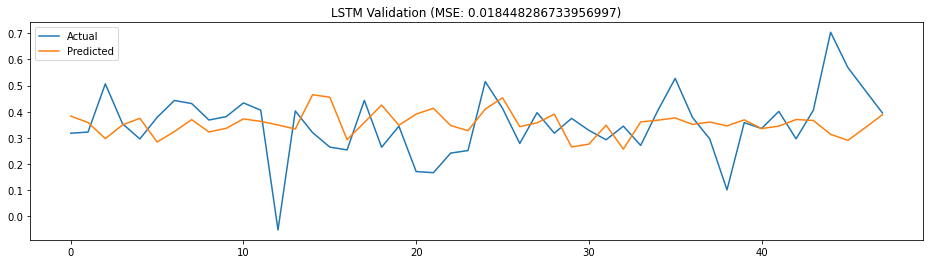

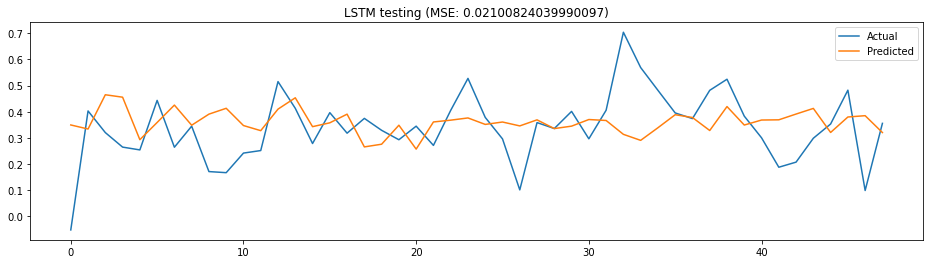

In [102]:
lstmValPred = model.predict(validationSeq_x)

lstmOutSamplePred = model.predict(outSampleSeq_x)

plot_results(validationSeq_y, lstmValPred, "LSTM Validation",range(len(validationSeq_y)))
plot_results(outSampleSeq_y, lstmOutSamplePred, "LSTM testing",range(len(outSampleSeq_y)))

## Saving a Neural Network Model to use it later

In [103]:
import os
dirName = f"C:\\Users\\vyasd\\OneDrive\\New folder (2)\\Desktop\\Internship Flip Robo\\company stock time series\\output"

try:
    os.mkdir(dirName)
    print("Directory " , dirName, "Created")
except FileExistsError:
    print("Directory" , dirName, "Already exists")
    
    
os.chdir(dirName)

model_name = "lstm"
filename = f"{model_name}_model.h7"
model.save(filename)

Directory C:\Users\vyasd\OneDrive\New folder (2)\Desktop\Internship Flip Robo\company stock time series\output Already exists
INFO:tensorflow:Assets written to: lstm_model.h7\assets


## Calling a Saved Model

In [104]:
import keras

model_name="lstm"
filename = f"{model_name}_model.h7"
saved_model = keras.models.load_model(filename)

yhat = saved_model.predict(outSampleSeq_x)
mse = mean_squared_error(outSampleSeq_y,cnnOutSamplePred)
print(mse)

0.3869132646567728


## Invert the Scaling

In [105]:
from numpy import concatenate

def invert_scaling(x_minmax,y_predicted, n_steps_in):
    reshaped_pred = y_predicted.reshape((y_predicted.shape[0],1))
    matrix = concatenate((x_minmax[n_steps_in-1:],reshaped_pred),axis=1)
    matrix_min_max_invert = min_max_scaler.inverse_transform(matrix)
    matrix_min_max_normal = normalizer.inverse_transform(matrix_min_max_invert)
    inv_pred = matrix_min_max_normal[:,-1]
    return inv_pred

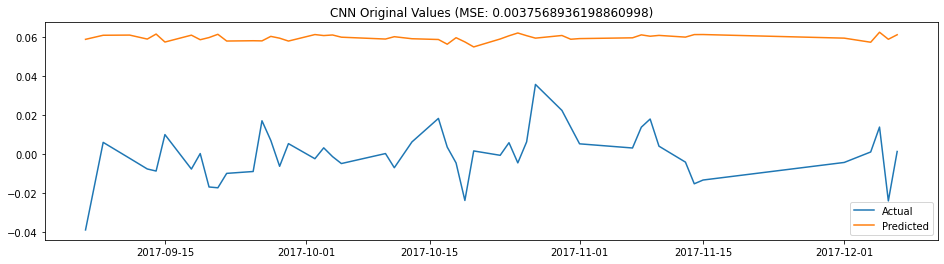

In [106]:
inv_yhat = invert_scaling(outSampleMinmax_x,cnnOutSamplePred,n_steps_in)
plot_results(df_comp_copy["Comp Stock"][-(no_validation_obs-n_steps_in+1):].values,
             inv_yhat,
             "CNN Original Values",
             df_comp_copy["Date"][-(no_validation_obs-n_steps_in+1):])